Based on Gupta et. al 2004 

https://ui.adsabs.harvard.edu/abs/2004A%26A...426..229G/abstract

Effect of geometry on $P_2$

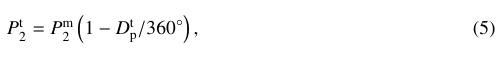
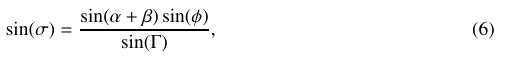
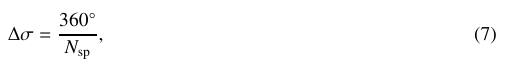
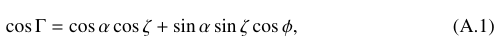
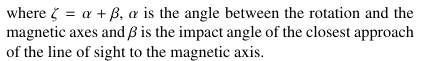

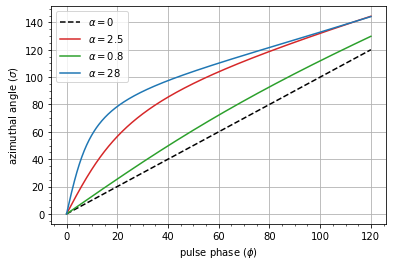

In [3]:
import numpy as np
import matplotlib.pyplot as pl
alphas = np.deg2rad([0, 2.5, 0.8, 28]) # inclination angle
betas = np.deg2rad([12, 1, 2.8, 3.7]) # impact parameter

phis = np.linspace(0, np.deg2rad(120), num=500) # phase

def gamma_fun(alpha, beta, phi):
    return np.arccos(np.cos(alpha) * np.cos(alpha + beta) + np.sin(alpha) * np.sin(alpha+beta) * np.cos(phi))

def sigma_fun(alpha, beta, phi):
    gamma = gamma_fun(alpha, beta, phi)
    arg = np.sin(alpha+beta) * np.sin(phi) / np.sin(gamma)
    return np.arcsin(arg)


sigmas = np.zeros([len(alphas), len(phis)])


for i in range(len(alphas)):
    alpha = alphas[i]
    beta = betas[i]
    for j,phi in enumerate(phis):
        #print(i, j)
        si = sigma_fun(alpha, beta, phi)
        # nesty hack and does not for for all!
                #print(np.sign(dsi), np.sign(dsi_pr))
                #print(np.sign(dsi), np.sign(dsi_pr))
        if j > 1:
            dsi = si - sigmas[i, j-1]
            dsi_pr = sigmas[i, j-1] - sigmas[i, j-2]
            if np.sign(dsi) == np.sign(dsi_pr):
                sigmas[i, j] = si
            else:
                nsi = np.pi - si
                if np.fabs(sigmas[i, j-1] - nsi) < np.deg2rad(5):
                    sigmas[i, j] = nsi
                else:
                    sigmas[i, j] = si
        else:
            sigmas[i, j] = si
            
fig = pl.figure()
ax = fig.add_subplot(111)
pl.grid()
pl.minorticks_on()    
pl.plot(np.rad2deg(phis), np.rad2deg(sigmas[0]), label=r"$\alpha=0$", ls="--", c="black")
pl.plot(np.rad2deg(phis), np.rad2deg(sigmas[1]), label=r"$\alpha=2.5$", c="tab:red")
pl.plot(np.rad2deg(phis), np.rad2deg(sigmas[2]), label=r"$\alpha=0.8$", c="tab:green")
pl.plot(np.rad2deg(phis), np.rad2deg(sigmas[3]), label=r"$\alpha=28$", c="tab:blue")
#ax.set_aspect('equal')
pl.legend()
pl.xlabel("pulse phase ($\phi$)")
pl.ylabel("azimuthal angle ($\sigma$)")
pl.show()

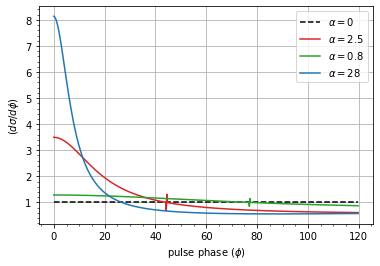

In [4]:
dphis = []
dsigmas = [[] for i in range(len(alphas))]

for i in range(len(phis) - 1 ):
        dphis.append(phis[i+1] - phis[i])

for i in range(len(alphas)):
    for j in range(len(sigmas[i]) - 1 ):
        dsigmas[i].append(sigmas[i,j+1] - sigmas[i,j])

dphis = np.array(dphis)
dsigmas = np.array(dsigmas)


fig = pl.figure()
ax = fig.add_subplot(111)
pl.grid()
pl.minorticks_on()    
pl.plot(np.rad2deg(phis[:-1]), dsigmas[0] / dphis, label=r"$\alpha=0$", ls="--", c="black")
pl.plot(np.rad2deg(phis[:-1]), dsigmas[1] / dphis, label=r"$\alpha=2.5$", c="tab:red")
pl.plot(np.rad2deg(phis[:-1]), dsigmas[2] / dphis, label=r"$\alpha=0.8$", c="tab:green")
pl.plot(np.rad2deg(phis[:-1]), dsigmas[3] / dphis, label=r"$\alpha=28$", c="tab:blue")
#ax.set_aspect('equal')
pl.legend()
pl.xlabel("pulse phase ($\phi$)")
pl.ylabel("($d\sigma / d\phi$)")
pl.show()